# Machine Learning Lab \#1

This notebook is on github at https://goo.gl/qfKVde. 

## Software Setup

This will start an installation program that will ask you questions. Accept license and all default settings when prompted.  When it finishes, it will add a line to your `~/.bash_profile` or `~/.bashrc` file so that anaconda (and the python related tools) are prepended to your `PATH` environment variable.  

* **NOTE:** Some of you are using windows; in which case anaconda3 shift with an _"Anaconda Console"_ program. If that is the case, you may use that instead of attempting to modify your PATH. 


Note that you will have to log-out and back into the shell to see the changes to your path. Alternatively, you may either  add `~/anaconda3/bin` to PATH yourself, or just re-run the `.bashrc` script (as I have done)

```bash
$ source ~/.bashrc
```

At this point in time the `conda` program should be on your search path. You can test it by typing `which conda`, and/or `conda --version`. 



One of the most frustrating things about developing software is when “it works on my machine” (but only mine).  Related to this is the problem that happens when something works until you update your libraries for some other project, then you return to old code and it is broken. 


To solve this, python programmers use virtual environments.  All of the libraries you need are installed into a self-contained environment, within which you can make sure you have the packages your software needs.  To create an environment for this project use this command line:

```bash
$ conda create -n CSE627 anaconda jupyter numpy scipy scikit-learn
```

Let’s break that command down:
* `conda` is a program with a number of subcommands (just like `git` is). The second token after `conda` is the subcommand. 
* The `create` subcommand creates a new virtual environment that will also use the `conda` package manager.
* The `-n CSE627`  options names the new environment. 
* The `anaconda`  package is actually a meta-package, it installs all of the default / useful python packages that python programmers tend to assume are present. 
* The `jupyter` package is the jupyter notebook we will be using as our python editor. This `.ipynb` file you are currently reading is the type of ducument that `jupyter` helps you to create. 
* The `numpy` package is the numerical N-Dimensional array (tensor) package.
* The `scipy` package is another meta-package with various tools that are useful for scientific computing. 
* The `scikit-learn` package is a suite of tools that are useful for machine learning in python.

Note that you will need to activate  the environment before these packages become available to you. 

```bash
$ source activate CSE627
```
Since you want `conda` to change environment variables in __your__ process, you must use `source` or a period `.` to `.` to run the `activate` script without creating a child process. 

***Window Users:*** Do not say `source`. The command is just `activate CSE627` for you. 

You should see the word `(CSE627)` prepended to your prompt in the terminal
If you want to install new software packages while inside of an environment, you may use `conda install <packagename>` to install it. For example:

```bash
(CSE627)$ conda install easydict
```

While in your `CSE627` environment, start a jupyter notebook web server by typing this:

```bash
(CSE627)$ jupyter notebook
```

Your browser should pop up, you can now use your jupyter notebook!

> Up until now, you may have been reading this in a browser. 
> Before continuing, you should download and open this notebook. 
>
> In a second terminal, change directories into the folder that you have `jupyter notebook` running.  From there 
> you can download this notebook:


> Now look for the downloaded notebook in the browser that popped up when you ran jupyter, and begin editing. 

In a `jupyter` notebook you edit code in cells, which are executed when you press `SHIFT+ENTER`. Similar to tools like `vim`, the `jupyter` editor allows you to run some extra editin commands by pressing the `ESC` key. You can also access most of those commands through the menus. The most important are:
* ESC + M -- Change the current cell to use [**[M]**arkdown](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) instead of executing the code
* ESC + Y -- Change  the current cell to P**[Y]**thon
* ESC + L -- Show **[L]**ine numbers
* ESC + A -- Add a new cell **[A]**bove the current cell
* ESC + B -- Add a new cell **[B]**elow the current cell
* ENTER -- Start editing the cell egain 

One of the coolest features of jupyter is that you can display non-textual output such as plots or figures right in the notebook. 

Some of the most popular plotting and scientific options can be automatically imported into your notebook's python ineterprer using the `%pylab inline` directive to jupyter. 

> **NOTE:** Jupyter interprets lines that start with `%` as speciel ('magic') directives to the jupyter program rather than as python statements. If a cell starts with a double percent-sign (`%%`) then it can change the way that entire cell is interprete. For example, you can cause it to interpret cells as `C++` code or as `bash` statements to be executed in a subprocess

In [1]:
%matplotlib inline

## Choosing a polynomial to fit some data

In order to illustrate some of the concepts of chapter 1, I want to start by fitting some parametric models to data.

This notebook has a portion that explores the ideas presented in the textbook, which aims to give you a solid mathematical foundation in order to better understand machine learning approaches. 



Let's start by fitting an order 1 polynomial (a line) to some scattered points. 

First, lets generate a random line.

It will have the equation:
$$ y(x) = w_0 x^0 + w_1 x^1 = w_0 + w_1 x$$

Let us generate the $\mathbf{w}$ vector by sampling from the 2-variable normal distribution $\mathcal{N}(\mathbf{w}|\mathbf{0}, \alpha^{-1}\mathbf{I})$

In [2]:
import numpy as np
from scipy.stats import norm

In [3]:
np.random.seed(128)  #<-- make sure we all get the same 'random' results
alpha = 1.0
w = norm.rvs(scale=1./alpha, size=2)
print(w)

[-0.399999    0.61917357]


* ***TIP:*** Put your curser at the end of an identifier such as the word `normal` in the python cell  above and press <kbd>SHIFT</kbd>+<kbd>TAB</kbd>.  Continue pressing <kbd>TAB</kbd> to see additional help.

Some explanation:
* The `seed` function initializes the state of the simple psueudo-random number generator. 
* The `alpha` variable is the precision if the Gaussian distribution that we assume our points come from. 
* The `norm.rvs` function is the (pythonic) way to generate numbers from a normal distribution. 
* There is also a convenient `randn(size)` function, but it always has variance of one. To set the precision to `alpha` I would need to divide by the square-root of alpha.
* The weights, `w` are normally distributed, which means that the line is not likely to have a steep slope and that it is 50% likely to have a negative y-intercept. 

Now we can generate points from the line 

In [4]:
x = np.linspace(0,1,10)
X = np.column_stack([x**0, x**1])
y = X.dot(w)

In [5]:
from matplotlib.pylab import plt

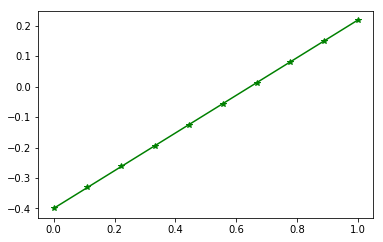

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(x, y, c='green', marker='*');
plt.axis('scaled');

A bit of explanation:
1. The `linspace` function is from the `numpy` package, which provides numerical operations on tensors. This function generates 10 equally spaced numbers betweeen 0 and 1 (including both 0 and 1). 
2. The `column_stack` function is from `numpy`, we are providing it with a list of vectors (1D tensors) and asking it to make a matrix (2D tensor) with those as its columns. 
3. In `numpy`, the `dot` method does matrix multiplication [using an `*` would multiply elementwise].

So,  there is a data matrix $\mathbf{X}$ that has a row for each sample ($x_i$) and a column for each feature $[\phi(x_n)]_k = x_n^k$. 

In [7]:
print(X)

[[1.         0.        ]
 [1.         0.11111111]
 [1.         0.22222222]
 [1.         0.33333333]
 [1.         0.44444444]
 [1.         0.55555556]
 [1.         0.66666667]
 [1.         0.77777778]
 [1.         0.88888889]
 [1.         1.        ]]


We need to imagine that each point on our curve is actually subject to some error. For simplicity, we will assume that all error is in the _vertical_ direction; that is, we are super-precise about the $x$ that we measure but the $y$ may have some noise.  

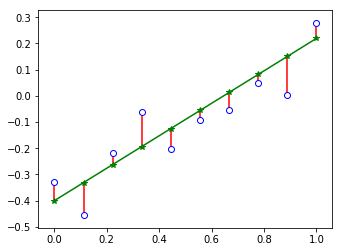

In [8]:
beta = 10
error = norm.rvs(scale=1./beta, size=len(y))
t = y + error

plt.figure(figsize=(6, 4))
plt.plot(x, y, color='green', marker='*', zorder=2)
plt.scatter(x, t, facecolor='white', edgecolors='blue', zorder=3)
plt.vlines(x, y, t, color='red', zorder=1)

plt.axis('scaled');

So, we have a data matrix $\mathbf{X}$ and measurments $\mathbf{t}$. 


In order to create that dataset, I used a known $\mathbf{w}$ but in practice the line's parameters ar unknown; we only have $\mathbf{X}$ and $\mathbf{t}$ and the assumption that $\mathbf{t} = \mathbf{X}^T\mathbf{t}+E$ where $E$ follows a normal distribution. 

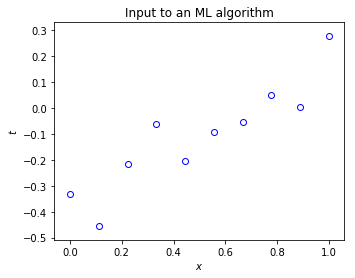

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(x, t, facecolor='white', edgecolors='blue', zorder=3)

plt.axis('scaled')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.title("Input to an ML algorithm")
plt.show()

## Exercise


<span class="mark">
    
 In the next cell, write a function $\texttt{phi(x, order)}$.
    
 Below the cell I have included some assertions; If you have done it correctly then your function should pass both of them. 
</span>
                                 
                                                                       


In [10]:
def phi(x, order):
    x = np.atleast_1d(x) # <-- Make sure the input is an array
    M = order  # <-- Notation from the book
    N = len(x) 
    
    return np.column_stack([x**k for k in range(order+1)])

In [11]:
assert np.allclose(phi(0.5, order=2), [1., 0.5, 0.25])
assert np.allclose(phi(x, order=1), X), "Your output does not match the expected for our examples"

## Exercise

<span class="mark">
    
Write a function $\texttt{eval_poly}(\texttt{phi}(\mathbf{x}), \mathbf{w})$ that takes as input a 2D array $\texttt{phi}(\mathbf{x})$ and a 1D array $\mathbf{w}$ of weights, and produces as output a 1D array $\mathbf{y}$.  

**If** the the input is a 1D array then you should _use_ the function $\texttt{phi}$ to generate the polynomial features. The _order_ of the polynomial is _one less_ the number of elements in $\mathbf{w}$. 

**Otherwise** if $\mathbf{x}$ is a 2D array you should assume that you have been passed a matrix $\textt{phi}(\mathbf{x})$ and each _row_ is a polynomial. 
</span> 


In [18]:
def eval_poly(x, w):
    x = np.atleast_1d(x)
    M = len(w)-1
    N = len(x)
    if len(x.shape) == 1:
        x = phi(x, order=M)
        
    return x.dot(w)

In [20]:
assert np.allclose(eval_poly(X, w), y) # Recall X=phi(x)
assert np.allclose(eval_poly(x, w), y)

# Exercise
<span class="mark">
    
Write a function $\texttt{sum_squared_error}(\mathbf{x}, \mathbf{w})$ that takes as input _either_ a 1D array _or_ a 2D array returned from a prior call to $\texttt{phi}$, along with target values $\mathbf{t}$ and weights $\mathbf{w}$. It should return $$E(\mathbf{w})=\frac{1}{2}\sum_{n=1}^{N}\left\{y(x_n, \mathbf{w})-t_n\right\}^2,$$ from (1.2) of your book, however I want you to _avoid using loops_, instead try to use optimized $\texttt{numpy}$ functions.
</span>


In [68]:
def sum_squared_error(t, x, w):
    t = np.atleast_1d(t)
    x = np.atleast_1d(x)
    N = len(x)
    M = len(w)-1
    
    if len(x.shape)  == 1:
        x = phi(x, order=M)
    
    return sum((eval_poly(x, w) - t)**2)/2.

In [74]:
assert sum_squared_error(x, t, w).round(2) == 4.91

## Exercise
Equation (1.62) of your book is:


\begin{align}
\ln p(\mathbf{t}|\mathbf{x}, \mathbf{w}, \beta) &= -\frac{\beta}{2}\sum_{n=1}^N \left\{y(x_n, \mathbf{w})-t_n\right\}^2 + \frac{N}{2}\ln \beta -\frac{N}{2}\ln(2\pi).
\end{align}


However, most optimization libaries want to _minimize_ some objective function, so it is useful to calculate the _negative_ log likelihood. 

<span class="mark">
    
Write a function that, given a parameter $\mathbf{w}$, along with an input matrix $\mathbf{X}=\phi(\mathbf{x})$ and the targets $\mathbf{t}$, evaluates the negative log likelihood $- \ln p( \mathbf{t} |\mathbf{x}, \mathbf{w}, \beta)$, where $\beta$ is the precision of the noise (e.g. 10 in our case I beleive).</span>



In [87]:
def neg_log_likelihood(t, x, w, beta=1):
    """ Evaluate the negative log likelihood of the data 
    
    Given data (x, t), and a setof linear weights `w` and noise precision `beta`, 
    find the negative natural log of the likelihood. 
    
    See eq. (1.62) of your book, but bear in mind I want the _negative_ log likelihood.
    """
    t = np.atleast_1d(t)
    x = np.atleast_1d(x)
    N = len(t)
    M = len(w)-1
        
    log_likelihood = -beta*sum_squared_error(t, x, w) + N*np.log(beta)/2. - N*np.log(2*np.pi)/2.
    return -log_likelihood

In [88]:
assert neg_log_likelihood(t, x, w).round(1)  == 9.2

----

Your textbook talks alot about the joint probability $p(t, x| \mathbf{w},\beta)$ or the conditional probability $p(t|x, \mathbf{w}, \beta)$. I think it is useful to try and plot the conditional probabilities for all $t$ and $x$ now that we have functions to calculate the likelihood. 

Some explanation of the code below:
* The (vertical) range of the data is unpredictable; it is the result of random $\mathbf{w}$.  I want top plot a $1\times1$ region, so I use the _center_ $y$ coordinate $c_y \pm \frac{1}{2}$ as the vertical range.
* In line 3 have already used the variable names `x` and `y`, so I declare two new variable using trailing underscored. *Trailing underscores are how we resolve name clashes in python*.
* Also in line 3, The `mgrid` object generates a 'mesh grid'; that is, it gives the $x$ and $y$ coordinates of every point on a grid. The number spacing of the grid elements is specified using python _slicing_ notation,
> *IMPORTANT*: Slicing is critical to effective use of python, read [here](https://www.tutorialspoint.com/numpy/numpy_indexing_and_slicing.htm) or [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) or [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mgrid.html) for more. 
* In general, loops are bad in python. Given some time, I could probably find a non-loopy way to do lines 6-8, but it was not clear to me how to do so and the number of iterations (10,000) is small. This is a case where I am comfortable 'breaking' that rule of thumb. 

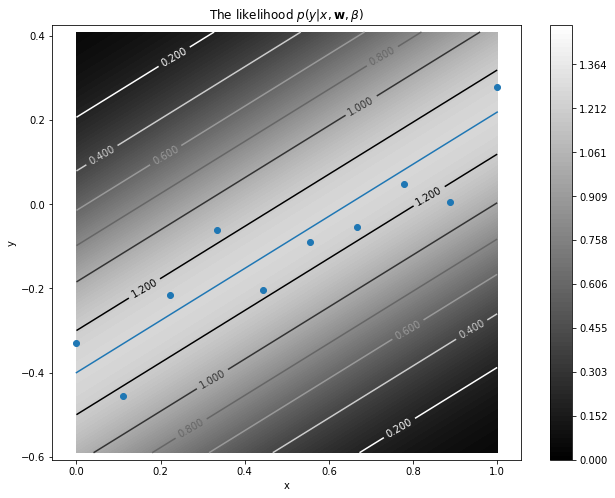

In [109]:
# Compute the NLL (Negative Log Likelihoods), discussed above
cy = (max(y)+min(y))/2.
y_, x_ = np.mgrid[cy-0.5:cy+0.5:100j, 0:1:100j]
nll = np.zeros((100,100))

for j in range(100):
    for i in range(100):
        nll[i,j] = neg_log_likelihood(y_[i,j], x_[i,j], w, beta=10)

p = np.exp(-nll)

# Plot The Figure, discussed below
plt.figure(figsize=(10.5,8))
plt.contourf(x_, y_, p, cmap=plt.cm.gray, levels=np.linspace(0, 1.5, 100))
plt.colorbar()
contours = plt.contour(x_, y_, p, cmap=plt.cm.gray_r)
plt.clabel(contours)
plt.scatter(x, t)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'The likelihood $p(y|x,\mathbf{w},\beta)$')
plt.axis('equal')
plt.show()

Some explanation of the plotting code:
* The `countour` function draws _iso-lines_ where the surface takes on constant values, and the `clabel` function modifies the graphics-object returned by `countour` by adding labels to each isoline. 
* When plotting data, I always like to keep an _equal_ aspect ration (do not stretch the $y$'s)

## Posterior probabilities
Our weights $\mathbf{w}$ where generated according to a Normal distibution with a mean of zero and a variance of $\alpha=1$ (scroll up, its true!). In practice, we may or may not know which distribution the wights come from, but heuristically we see good results if we assume polynomial weights are generated by zero-mean gaussians $$\mathbf{w} \sim \mathcal{N}(\mathbf{w}|\mathbf{0}, \alpha^{-1}\mathbf{I})$$. 

According to the book (1.65), we can see that the prior $p(\mathbf{w}|\alpha)$ can be expressed as 


\begin{align}
p(\mathbf{w}|\alpha) &= \mathcal{N}(\mathbf{w}|\mathbf{0}, \alpha^{-1}\mathbf{I}) \\
                     &= \left(\frac{\alpha}{2\pi}\right)^{(M+1)/2} \exp\left\{-\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}\right\} \label{eq:prior}\\ 
\end{align}


In practice, it is often better to work with the negative log likelihood (NLL), which we often seek to minimize. 

Can you come up with an expression for the negative log likelihood and type it out(using latex) in the next cell?

### Exercise 3: 

<span class="mark">
    
Write an expression for $-\ln p(\mathbf{w}|\alpha)$, that is, take the negative logarithm of equation $\eqref{eq:prior}$ practice writing it out in $\LaTeX$.  
</span>


\begin{align}
-\ln p(\mathbf{w}|\alpha) &= \text{TODO} & \text{(practice your $\LaTeX$)} \label{eq:neglogprior}\\
\end{align} 


Now that we have an expression for the likelihood and that prior, we have 
$$
\underbrace{p(\mathbf{w}|\mathbf{X}, \mathbf{t}, \alpha, \beta)}_{\text{posterior}} 
\propto 
\underbrace{p(\mathbf{t}|\mathbf{X}, \mathbf{w}, \beta)}_{\text{likelihood}} 
\times 
\underbrace{p(\mathbf{w}|\alpha)}_{\text{prior}}
$$

### Find the minimum

\begin{align}
w &= \arg\min_{\mathbf{w}} \left\{ -\ln p(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta) \right\}\\
  &= \arg\min_{\mathbf{w}} \left\{  \frac{\beta}{2}||\mathbf{X}\mathbf{w}-\mathbf{t}||^2-\frac{N}{2}\ln\beta + \frac{N}{2}\ln(2\pi) \right\}\\
  &= \arg\min_{\mathbf{w}}   \left\{\frac{1}{2}||\mathbf{X}\mathbf{w}-\mathbf{t}||^2 \right\} \\
  &= \arg\min_{\mathbf{w}}   \left\{\frac{1}{2}(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-2\mathbf{w}^T\mathbf{X}^T\mathbf{t}+\mathbf{t}^T\mathbf{t}) \right\}\\
    &= \arg\min_{\mathbf{w}}   \left\{\frac{1}{2}\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}) \right\}\\
\end{align}

The gradient is 
$
\begin{align}
%
\frac{\partial}{\partial \mathbf{w}}\left\{ \frac{1}{2}\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}\right\} 
&= \frac{1}{2}\frac{\partial}{\partial \mathbf{w}}\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} -\frac{\partial}{\partial \mathbf{w}}\mathbf{w}^T\mathbf{X}^T\mathbf{t} \\
&= \mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{t}\\
\end{align}
$

### Exercise: 


<span class="mark">
(a) Write a solution for the max likelihood estimate for $\mathbf{w}$ using numpy.

There is a $\texttt{numpy.linalg.solve}$ function that solves systems of equations.  
</span>


In [113]:
def mle_w(X, t):
    N = X.shape[0]
    M = X.shape[1]-1
    assert len(t) == N, "The number of targets must match the number of inputs"

    w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(t))
    return w_ml

In [116]:
# def mle_w(X, t)...

In [141]:
w_mle_predicted = mle_w(X, t) 

<span class="mark">(b) Plot the curve along with a scatter plot of the points
(Follow the example from the first part of this presentation, around In[8])</span>

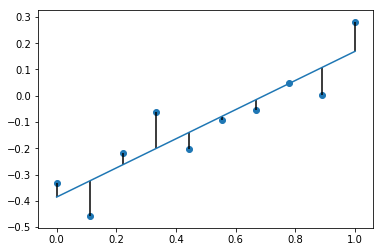

In [142]:
y_mle_predicted = X.dot(w_mle_predicted)
plt.plot(x, y_mle_predicted)
plt.scatter(x, t)
plt.vlines(x, y_mle_predicted, t)

#### (c)  Evaluate the sum-squared-error and compare to the error we get from the 'true' $\mathbf{w}$.

In [143]:
print("The ML estimate error is", sum_squared_error(t, x, w_mle_predicted).round(3))
print("The oiginal error is", sum_squared_error(t, x, w).round(3))

The ML estimate error is 0.035
The oiginal error is 0.039


### Exercise 5:  

The _max a prior_ estimate includes the prior likelihood of $\mathbf{w}$. 
Based on your solution for $\eqref{eq:neglogprior}$  we know that this means $\frac{\beta}{2}\|\mathbf{Xw}-\mathbf{t}\|^2 + \frac{\alpha}{2}\|\mathbf{w}\|^2$ should be minimized. 

The derivative of $\frac{\alpha}{2}\|\mathbf{w}\|^2$ is $\alpha\mathbf{w}$. 

The overall derivative is then zero if $(\beta\mathbf{X}^T\mathbf{X} + \alpha\mathbf{I})\mathbf{w} = \beta\mathbf{X}^T\mathbf{t}$

If we divide both sides by $\beta$ then this can be rewritten as $(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{t}$ where $\lambda=\frac{\alpha}{\beta}$, which is equation (1.4) in yoru book. 




 <span class="mark">(a) Write a solution for the MAP estimate</span>

In [122]:
def map_w(X, t, alpha, beta):
    N = X.shape[0]
    M = X.shape[1]-1
    assert len(t) == N, "The number of targets must match the number of inputs"
    
    # Solving for 'w' is now just about a 1-liner....
    return np.linalg.solve(X.T.dot(X) + (alpha/beta)*np.eye(M+1), X.T.dot(t))   

In [ ]:
# def map_w(X, t, alpha, beta): ....

In [133]:
w_map_predicted = map_w(X, t, alpha, beta)

#### (b)  Plot your solution

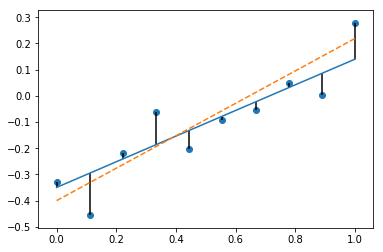

In [134]:
y_map_predicted = X.dot(w_map_predicted)
plt.plot(x, y_map_predicted)
plt.plot(x, y, ls='--')
plt.scatter(x, t)
plt.vlines(x, y_map_predicted, t)

In [136]:
print(np.linalg.norm(w))
print(np.linalg.norm(w_map_predicted))
print(np.linalg.norm(w_mle_predicted))

0.7371398206660911
0.6015791607660766
0.6757045366081919
